In [0]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/Colab\ Notebooks/gnr652/data/

/content/gdrive/My Drive/Colab Notebooks/gnr652/data


In [0]:
ls

sat-4-full.mat  sat-6-full.mat


In [0]:
import scipy.io as sio

IMAGES_DATA_PATH = 'sat-4-full.mat'

def load_image_data(images_data_path=IMAGES_DATA_PATH):
    print("##########    Loading Data    ##########")    
    test = sio.loadmat(images_data_path)
    print(test)
    print("##########    Data type    ###########")
    print(type(test))
    print(test.values())
    return test

 

In [0]:
#checkout the data
from keras.utils import to_categorical
from keras import optimizers

#models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#helper
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Using TensorFlow backend.


In [0]:
###############################################################################
#load the data
import scipy.io
data = scipy.io.loadmat("sat-4-full.mat")
train_images = data['train_x']
train_labels = data['train_y']

test_images = data['test_x']
test_labels = data['test_y']

####################################################################
#Checkout the data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

#Change the dimension to fit into the model
x_train = train_images.transpose(3,0,1,2)
t_train = train_labels.transpose()

x_test = test_images.transpose(3,0,1,2)
t_test = test_labels.transpose()

print('Training data shape : ', x_train.shape, t_train.shape)
print('Testing data shape : ', x_test.shape, t_test.shape)


#Find the unique numbers from the train labels
nClasses = 4
 
#Display the change for category label using one-hot encoding
print('Original label 0 : ', t_train[0])
print('After conversion to categorical ( one-hot ) : ', t_train[0])

#preprocess
for t in x_train:
    t = t.astype('float32')
    t /= 255
for t in x_test:
    t = t.astype('float32')
    t /= 255

Training data shape :  (28, 28, 4, 400000) (4, 400000)
Testing data shape :  (28, 28, 4, 100000) (4, 100000)
Training data shape :  (400000, 28, 28, 4) (400000, 4)
Testing data shape :  (100000, 28, 28, 4) (100000, 4)
Original label 0 :  [0 0 0 1]
After conversion to categorical ( one-hot ) :  [0 0 0 1]


In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(28, (3, 3), padding='same', activation='relu', input_shape=(28 , 28 , 4)))
    model.add(Conv2D(28, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(56, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(56, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [0]:
!pip install keras_metrics

In [0]:
import keras_metrics

In [0]:

#Training the network
model1 = createModel()

batch_size = 256
epochs = 10
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
model1.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])
 
history = model1.fit(x_train, t_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, t_test))

Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 [==============================] - 32s 81us/step - loss: 0.3681 - acc: 0.8691 - precision: 0.9056 - recall: 0.9028 - val_loss: 0.1717 - val_acc: 0.9367 - val_precision: 0.9876 - val_recall: 0.8393
Epoch 2/10
400000/400000 [==============================] - 32s 80us/step - loss: 0.1232 - acc: 0.9575 - precision: 0.9517 - recall: 0.9482 - val_loss: 0.0877 - val_acc: 0.9699 - val_precision: 0.9920 - val_recall: 0.9161
Epoch 3/10
400000/400000 [==============================] - 31s 78us/step - loss: 0.0843 - acc: 0.9714 - precision: 0.9657 - recall: 0.9587 - val_loss: 0.0638 - val_acc: 0.9806 - val_precision: 0.9813 - val_recall: 0.9616
Epoch 4/10
400000/400000 [==============================] - 32s 80us/step - loss: 0.0680 - acc: 0.9771 - precision: 0.9728 - recall: 0.9635 - val_loss: 0.0686 - val_acc: 0.9767 - val_precision: 0.9914 - val_recall: 0.9510
Epoch 5/10
400000/400000 [==============================] - 

In [0]:
score, accuracy, precision, recall = model1.evaluate(x_test, t_test)
print("Score: ", score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

100000/100000 [==============================] - 11s 105us/step
Score:  0.03536485085642431
Accuracy:  0.98757
Precision:  0.996711829486583
Recall:  0.9606705105160156


Text(0.5, 1.0, 'Accuracy Curves')

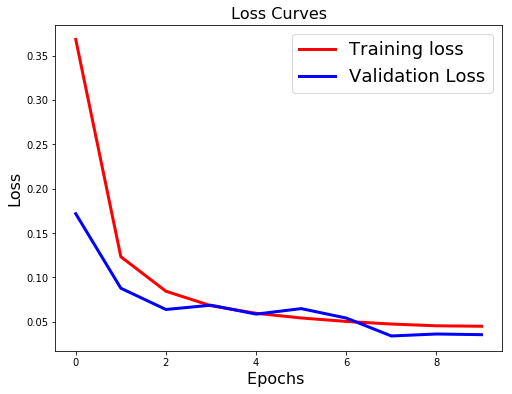

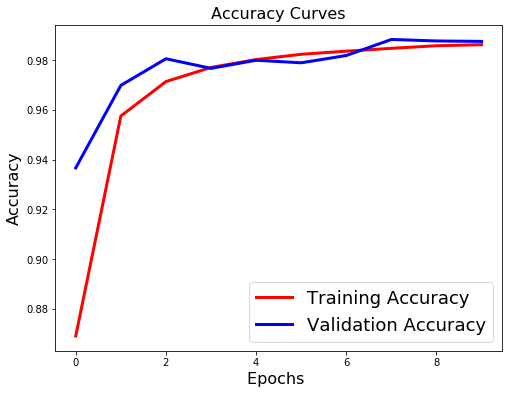

In [0]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
from keras.layers.core import Activation
from keras import backend as K

In [0]:

model = Sequential()

model.add(Conv2D(28, (3, 3), padding='same', input_shape=(28 , 28 , 4)))
convout1 = Activation('relu')
model.add(convout1)

model.add(Conv2D(28, (3, 3)))
convout2 = Activation('relu')
model.add(convout2)

convout3 = MaxPooling2D(pool_size=(2, 2))
model.add(convout3)    
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same'))
convout4 = Activation('relu')
model.add(convout4)

model.add(Conv2D(56, (3, 3)))
convout5 = Activation('relu')
model.add(convout5)

convout6 = MaxPooling2D(pool_size=(2, 2))
model.add(convout6)
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same'))
convout7 = Activation('relu')
model.add(convout1)

model.add(Conv2D(56, (3, 3)))
convout8 = Activation('relu')
model.add(convout8)

convout9 = MaxPooling2D(pool_size=(2, 2))
model.add(convout9)
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 28)        1036      
_________________________________________________________________
activation_7 (Activation)    multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 28)        7084      
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 28)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 56)        14168     
__________

In [0]:

img_to_visualize = x_train[65]
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)
print(img_to_visualize)


# # with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
layer_output = get_3rd_layer_output([x_train])[0]

[[[[145 144 126 151]
   [157 152 133 149]
   [161 152 131 147]
   ...
   [139 138 123 166]
   [141 139 122 162]
   [138 135 117 161]]

  [[153 150 129 153]
   [157 146 131 148]
   [167 157 134 146]
   ...
   [137 136 119 169]
   [141 137 123 162]
   [137 135 123 159]]

  [[153 151 134 153]
   [157 148 135 147]
   [164 156 134 143]
   ...
   [143 140 119 169]
   [140 139 121 163]
   [142 138 117 165]]

  ...

  [[145 138 120 159]
   [148 143 119 156]
   [149 147 122 156]
   ...
   [180 169 146 158]
   [168 155 136 158]
   [159 150 130 159]]

  [[144 144 126 155]
   [145 138 123 153]
   [145 143 120 156]
   ...
   [171 156 140 155]
   [158 147 136 155]
   [155 147 126 160]]

  [[131 133 118 153]
   [128 132 120 153]
   [138 140 122 156]
   ...
   [165 155 137 151]
   [151 141 135 154]
   [146 140 127 161]]]]


In [0]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs
    print(layer.output)

#     _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

#     convolutions = convout1_f(img_to_visualize)
#     convolutions = np.squeeze(convolutions)

#     print ('Shape of conv:', convolutions.shape)
    
#     n = convolutions.shape[0]
#     n = int(np.ceil(np.sqrt(n)))
    
#     # Visualization of each filter of the layer
#     fig = plt.figure(figsize=(12,8))
#     for i in range(len(convolutions)):
#         ax = fig.add_subplot(n,n,i+1)
#         ax.imshow(convolutions[i], cmap='gray')

In [0]:
layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data)

NameError: ignored